In [101]:
#!pip install tensorflow
#!pip install keras

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [103]:
from tensorflow import keras

In [104]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [105]:
df =pd.read_csv("forestfires.csv")
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [106]:
# As Dummy variables are already given for month and day in data set, lets drop month and day
df= df.drop(["month", "day"], axis=1)
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [107]:
df.shape

(517, 29)

In [108]:
df.info() # It can be seen that there is no Null value in data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [109]:
X = df.drop("size_category", axis=1)
X.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0


In [110]:
y= pd.DataFrame({"size_category" : df.iloc[:, -1]})
y

,size_category
0,small
1,small
2,small
3,small
4,small
...,...
512,large
513,large
514,large
515,small


In [111]:
# lets check for proportion of values for small and large catagory
y.value_counts()/len(y)

size_category
small            0.731141
large            0.268859
dtype: float64

In [112]:
# it can be seen that small catagory is almost 73 % and large is 26 %,
# so handling this imbalance by resampling

In [113]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [114]:
x_resampled, y_resampled = RandomOverSampler().fit_resample(X, y)

In [115]:
print(x_resampled.shape)
print(y_resampled.shape)

(756, 28)
(756, 1)


In [116]:
y_resampled.value_counts()

size_category
large            378
small            378
dtype: int64

In [117]:
y_resampled["size_category"]=y_resampled["size_category"].map({"small":0, "large":1})

In [118]:
# Using Test train slpit
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

In [120]:
# Applying Standard scalar on the data
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()
X_train = scaled.fit_transform(X_train)
X_test = scaled.transform(X_test)

# Applyig Neural network

In [121]:
#Initialising ANN
classifier = Sequential()

# Adding the input layer and first hidden layer 
classifier.add(Dense(units=10, kernel_initializer= "he_uniform", activation= "relu", input_dim=28 ))
classifier.add(Dropout(0.2))

# Adding second hidden layer
classifier.add(Dense(units=15, kernel_initializer= "he_uniform", activation= "relu"))
classifier.add(Dropout(0.3))

classifier.add(Dense(units=10, kernel_initializer= "he_uniform", activation= "relu"))
classifier.add(Dropout(0.2))

# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer= "glorot_uniform", activation= "sigmoid"))


# Compling the ANN
classifier.compile(optimizer= "adam", loss="binary_crossentropy", metrics= ["accuracy"])

In [122]:
# Fitting the ANN on training data set
model_history = classifier.fit(X_train, y_train, validation_split=0.3, batch_size=10, epochs=100)

Epoch 1/100
37/37 [==============================] - 1s 5ms/step - loss: 0.7866 - accuracy: 0.5027 - val_loss: 0.7088 - val_accuracy: 0.5723
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 0.7884 - accuracy: 0.5000 - val_loss: 0.6978 - val_accuracy: 0.5283
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 0.7367 - accuracy: 0.5216 - val_loss: 0.6910 - val_accuracy: 0.5409
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 0.7083 - accuracy: 0.5297 - val_loss: 0.6923 - val_accuracy: 0.5409
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - loss: 0.7314 - accuracy: 0.5432 - val_loss: 0.6895 - val_accuracy: 0.5472
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.5432 - val_loss: 0.6889 - val_accuracy: 0.5346
Epoch 7/100
37/37 [==============================] - 0s 2ms/step - loss: 0.7220 - accuracy: 0.5108 - val_loss: 0.6881 - val_accuracy: 0.5409
Epoch 8/100
3

37/37 [==============================] - 0s 2ms/step - loss: 0.6179 - accuracy: 0.6486 - val_loss: 0.6337 - val_accuracy: 0.6792
Epoch 59/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6254 - accuracy: 0.6243 - val_loss: 0.6284 - val_accuracy: 0.6855
Epoch 60/100
37/37 [==============================] - 0s 2ms/step - loss: 0.5903 - accuracy: 0.6919 - val_loss: 0.6266 - val_accuracy: 0.6667
Epoch 61/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6146 - accuracy: 0.6514 - val_loss: 0.6171 - val_accuracy: 0.6855
Epoch 62/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6103 - accuracy: 0.6838 - val_loss: 0.6110 - val_accuracy: 0.7170
Epoch 63/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6349 - accuracy: 0.6676 - val_loss: 0.6126 - val_accuracy: 0.6918
Epoch 64/100
37/37 [==============================] - 0s 2ms/step - loss: 0.5648 - accuracy: 0.6838 - val_loss: 0.6082 - val_accuracy: 0.7044
Epoch 65/100
37/37 

In [123]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


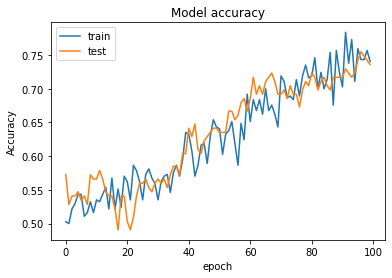

In [124]:
# summary of History for accuracy
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

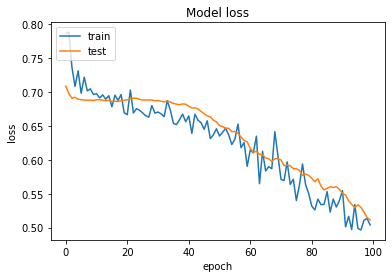

In [125]:
# summary of History for loss
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [126]:
# Predicting the test 
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

In [127]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [128]:
confusion_matrix(y_test, y_pred)

array([[86, 35],
       [36, 70]], dtype=int64)

In [129]:
accuracy_score(y_test, y_pred)

0.6872246696035242

# Optimizing the parameters using keras tuner

In [130]:
from keras_tuner import RandomSearch
from tensorflow.keras import layers

In [131]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten())
    for i in range(hp.Int("num_layers", 2, 20)):
        model.add(
            layers.Dense(
                units=hp.Int("units_" + str(i), min_value=32, max_value=512, step=32),
                activation="relu",
            )
        )
    model.add(layers.Dense(1, activation="sigmoid"))
    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    return model

In [132]:
tuner = RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)

In [133]:
tuner.search(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Trial 3 Complete [00h 00m 21s]
val_accuracy: 0.65638767182827

Best val_accuracy So Far: 0.933920681476593
Total elapsed time: 00h 01m 07s
INFO:tensorflow:Oracle triggered exit


In [134]:
tuner.results_summary()

Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 9
units_0: 160
units_1: 480
learning_rate: 0.001
units_2: 480
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
Score: 0.933920681476593
Trial summary
Hyperparameters:
num_layers: 3
units_0: 256
units_1: 224
learning_rate: 0.0001
units_2: 32
Score: 0.89647576212883
Trial summary
Hyperparameters:
num_layers: 10
units_0: 384
units_1: 384
learning_rate: 0.01
units_2: 128
units_3: 192
units_4: 64
units_5: 224
units_6: 192
units_7: 320
units_8: 320
units_9: 32
Score: 0.65638767182827


In [141]:
#Initialising ANN
classifier1 = Sequential()

# Adding the input layer and first hidden layer 
classifier1.add(Dense(units=160, activation= "relu", input_dim=28 ))
classifier1.add(Dense(units=480,  activation= "relu"))
classifier1.add(Dense(units=480,  activation= "relu"))
classifier1.add(Dense(units=32,  activation= "relu"))
classifier1.add(Dense(units=32,  activation= "relu"))
classifier1.add(Dense(units=32,  activation= "relu"))
classifier1.add(Dense(units=32,  activation= "relu"))
classifier1.add(Dense(units=32,  activation= "relu"))
classifier1.add(Dense(units=32,  activation= "relu"))
#classifier1.add(Dense(units=32,  activation= "relu"))
#classifier1.add(Dense(units=32,  activation= "relu"))
#classifier1.add(Dense(units=32,  activation= "relu"))
#classifier1.add(Dense(units=32,  activation= "relu"))
#classifier1.add(Dense(units=32,  activation= "relu"))

# Adding the output layer
classifier1.add(Dense(units=1, activation= "sigmoid"))

# Compling the ANN
optimizer = keras.optimizers.Adam(learning_rate=0.001)
classifier1.compile(optimizer=optimizer, loss="binary_crossentropy", metrics= ["accuracy"])

In [142]:
model_history1= classifier1.fit(X_train, y_train, validation_split=0.3, batch_size=10, epochs=100)

Epoch 1/100
37/37 [==============================] - 1s 7ms/step - loss: 0.6805 - accuracy: 0.5622 - val_loss: 0.6726 - val_accuracy: 0.5472
Epoch 2/100
37/37 [==============================] - 0s 3ms/step - loss: 0.6238 - accuracy: 0.6405 - val_loss: 0.6577 - val_accuracy: 0.5472
Epoch 3/100
37/37 [==============================] - 0s 3ms/step - loss: 0.5894 - accuracy: 0.7000 - val_loss: 0.6267 - val_accuracy: 0.6101
Epoch 4/100
37/37 [==============================] - 0s 3ms/step - loss: 0.5230 - accuracy: 0.7595 - val_loss: 0.6606 - val_accuracy: 0.6730
Epoch 5/100
37/37 [==============================] - 0s 3ms/step - loss: 0.4463 - accuracy: 0.7919 - val_loss: 0.6333 - val_accuracy: 0.6792
Epoch 6/100
37/37 [==============================] - 0s 3ms/step - loss: 0.3605 - accuracy: 0.8514 - val_loss: 0.6677 - val_accuracy: 0.7358
Epoch 7/100
37/37 [==============================] - 0s 3ms/step - loss: 0.3608 - accuracy: 0.8405 - val_loss: 0.6405 - val_accuracy: 0.6918
Epoch 8/100
3

Epoch 59/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0165 - accuracy: 0.9892 - val_loss: 1.2027 - val_accuracy: 0.8553
Epoch 60/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0162 - accuracy: 0.9919 - val_loss: 1.0642 - val_accuracy: 0.8994
Epoch 61/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0166 - accuracy: 0.9892 - val_loss: 1.1335 - val_accuracy: 0.8868
Epoch 62/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0152 - accuracy: 0.9919 - val_loss: 1.2616 - val_accuracy: 0.8805
Epoch 63/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0134 - accuracy: 0.9919 - val_loss: 1.4274 - val_accuracy: 0.8616
Epoch 64/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0154 - accuracy: 0.9919 - val_loss: 1.4002 - val_accuracy: 0.8742
Epoch 65/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0219 - accuracy: 0.9865 - val_loss: 0.9746 - val_accuracy: 0.8994
Epoch 

In [143]:
# Predicting the test 
y_pred1 = classifier1.predict(X_test)
y_pred1 = (y_pred1 >= 0.5)

In [144]:
accuracy_score(y_test, y_pred1)

0.8854625550660793

In [145]:
y_pred2 = classifier1.predict(X_train)
y_pred2 = (y_pred2 >= 0.5)

In [146]:
accuracy_score(y_train,y_pred2)

0.9546313799621928